# Mask R-CNN - Test on COCO Dataset

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
# import matplotlib as plt
import mrcnn.utils     as utils
import mrcnn.visualize as visualize

from mrcnn.prep_notebook import build_trainfcn_pipeline, build_mrcnn_inference_pipeline
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch
# from mrcnn.visualize import (plot_3d_heatmap, plot_2d_heatmap, plot_2d_heatmap_compare, plot_3d_heatmap_compare,
#                             display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, display_heatmaps_mrcnn_fcn)
                             
# input_parms = " --epochs         2   --steps_in_epoch 32  --last_epoch 0 "
input_parms  =" --batch_size     1  "
input_parms +=" --lr 0.00001         --val_steps 8 " 
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco "
input_parms +=" --fcn_logs_dir   train_fcn8_subset " 
input_parms +=" --mrcnn_model    last "
# input_parms +=" --fcn_model      init "
# input_parms +=" --opt            adam "
# input_parms +=" --fcn_arch       fcn8 " 
# input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout         screen "
input_parms +=" --coco_classes   62 63 67 78 79 80 81 82 72 73 74 75 76 77"
# input_parms +=" --new_log_folder    "
parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
print(args)

Current working dir:  E:\git_projs\MRCNN3\notebooks
appending '..' to sys.path


Using TensorFlow backend.


Namespace(batch_size='1', coco_classes=[62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77], epochs=1, fcn_arch='FCN32', fcn_layers='fcn32+', fcn_logs_dir='train_fcn8_subset', fcn_model='last', last_epoch=0, lr='0.00001', mrcnn_exclude_layers=None, mrcnn_logs_dir='train_mrcnn_coco', mrcnn_model='last', new_log_folder=False, opt='ADAGRAD', steps_in_epoch=1, sysout='SCREEN', val_steps='8')


## Detection Pipeline (build model and load weights)

In [2]:
# mrcnn_model, fcn_model = build_traininf_pipeline(fcn_weight_file = WEIGHT_FILE, batch_size = 2)
mrcnn_model = build_mrcnn_inference_pipeline(args = args)


--> Execution started at: 11-25-2018 @ 12:51:22
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 
    MRCNN Model        :  last
    FCN Model          :  last
    MRCNN Log Dir      :  train_mrcnn_coco
    FCN Log Dir        :  train_fcn8_subset
    FCN Arch           :  FCN32
    FCN Training Layers:  fcn32+
    sysout             :  SCREEN
>>> Initialize Paths
 windows  Windows

Paths:
-------------------------
COCO_DATASET_PATH              F:\MLDatasets\coco2014
COCO_HEATMAP_PATH              F:\MLDatasets\coco2014_heatmaps
COCO_MODEL_PATH                F:\PretrainedModels\mask_rcnn_coco.h5
DIR_DATASET                    F:\MLDatasets
DIR_PRETRAINED                 F:\PretrainedModels
DIR_ROOT                       F:\
DIR_TRAINING                   F:\models
FCN_TRAINING_PATH              F:\models\train_fcn8_subset
FCN_VGG16_MODEL_PATH           F:\PretrainedModels\fcn_vgg16_weights_tf_dim_ordering_tf_kernels.h5
MRCNN_TRAINING_PATH            F:\models\train_mrcnn_coco
RE

    Folder:  F:\models\train_mrcnn_coco\mrcnn20181011T1100
    Checkpoints:  ['mrcnn_0001.h5', 'mrcnn_0034.h5', 'mrcnn_0071.h5', 'mrcnn_0103.h5']
    find_last():   dir_name: F:\models\train_mrcnn_coco\mrcnn20181011T1100
    find_last(): checkpoint: F:\models\train_mrcnn_coco\mrcnn20181011T1100\mrcnn_0103.h5
>>> load_weights() from : F:\models\train_mrcnn_coco\mrcnn20181011T1100\mrcnn_0103.h5
layers type:  <class 'list'> length:  378
    Weights file loaded: F:\models\train_mrcnn_coco\mrcnn20181011T1100\mrcnn_0103.h5 
MRCNN  MODEL Load weight file COMPLETE 


### Build test datasets

In [3]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
from mrcnn.coco import prep_coco_dataset
# load_class_ids = [62,63,67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
print('load coco classes: ', args.coco_classes)
load_class_ids = args.coco_classes

# dataset_test   = prep_coco_dataset(['val'], mrcnn_model.config, generator = False , return_coco = True, active_class_ids=load_class_ids)
dataset_test = prep_coco_dataset(["train", "val35k"], mrcnn_model.config, generator = False , return_coco = True, active_class_ids=load_class_ids)
# dataset_val   = prep_coco_dataset(["minival"]        , mrcnn_model.config, generator = False , return_coco = True, active_class_ids=load_class_ids)

print(len(dataset_test.image_ids), len(dataset_test.image_info))
dataset_test.display_active_classes()

load coco classes:  [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_train2014.json  into memory...
Done (t=22.46s)
creating index...
index created!
 load subset of classes:  [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
 image dir            :  F:\MLDatasets\coco2014\train2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_train2014.json
 number of images     :  24242
 image_ids[:10]       :  [131074, 131075, 524311, 524314, 262172, 393251, 131113, 524340, 393268, 262207]
 image_ids[1000:1010] :  [5113, 5115, 267266, 136200, 398349, 529427, 5140, 5142, 136230, 136232]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_valminusminival2014.json  into memory...
Done (t=9.94s)
creating index...
index created!
 load subset of classes:  [62, 63, 67, 78, 79, 80, 81, 82, 72, 73, 74, 75, 76, 77]
 image dir            :  F:\MLDatasets\coco2014\val2014
 jso

In [ ]:
# test_batch_x, _= next(test_generator)
# for i in test_batch_x:
#     print(type(i), i.shape)

##  Run detection pipeline on random image

Loading 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000


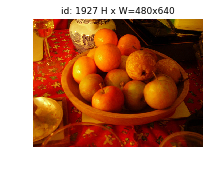

In [8]:
from mrcnn.prep_notebook import get_image_batch
_ = get_image_batch(dataset_test, 1927, display=True)

In [7]:
from mrcnn.prep_notebook import run_mrcnn_detection
results, gt_data = run_mrcnn_detection(mrcnn_model,dataset_test, image_id=1927, verbose = 1)
 #image_id = 1927, 8339

[[ 129    0  456  184]
 [ 301  173  765  960]
 [ 530  350  688  547]
 [ 424  426  552  602]
 [ 442  534  682  869]
 [ 270  365  445  538]
 [ 341  230  518  387]
 [ 179  360  299  512]
 [ 219  507  347  650]
 [ 802  757  883 1024]
 [ 749   48  888  550]
 [ 456  277  627  430]
 [ 299  326  365  392]
 [ 129  216  333  501]
 [ 317  558  499  744]
 [ 129    0  895  947]]
Image Id  : 1927     External Id: coco.9866     Image Reference: http://cocodataset.org/#explore?id=9866
Image meta:  [1927  480  640    3  128    0  896 1024    1    1]
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (1, 1000, 81) <class 'numpy.ndar

Image Meta:  [1927  480  640    3  128    0  896 1024    1    1]


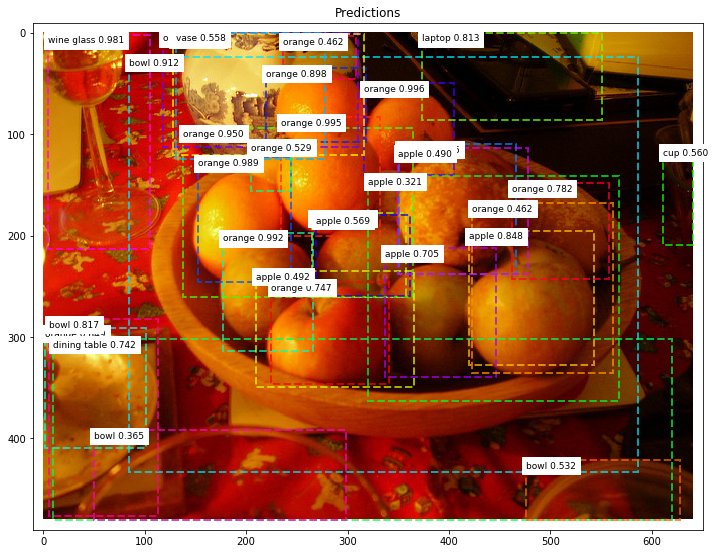

gt_class_id              shape: (16,)                 min:   41.00000  max:   76.00000
gt_bbox                  shape: (16, 4)               min:    0.00000  max: 1024.00000


In [9]:
from mrcnn.utils import log # Display results
ax = visualize.get_ax(rows =1, cols = 1, size= 12)
r = results[0]
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_data[0]['gt_class_id'])
log("gt_bbox", gt_data[0]['gt_bbox'])
# log("gt_mask", gt_mask)

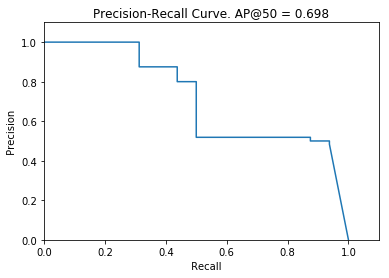

In [11]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_data[0]['gt_bbox'], gt_data[0]['gt_class_id'], 
                                          r['molded_rois'], r['class_ids'], r['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)

In [10]:
r = results[0]
print('ground truth')
print(gt_data[0]['gt_bbox'])
print(gt_data[0]['gt_class_id'])
print('rois:')
print(r['rois'])
print(r['class_ids'])
print('molded rois:')
print(r['molded_rois'])
print('pr_scores:')
print(r['pr_scores'])

ground truth
[[ 129    0  456  184]
 [ 301  173  765  960]
 [ 530  350  688  547]
 [ 424  426  552  602]
 [ 442  534  682  869]
 [ 270  365  445  538]
 [ 341  230  518  387]
 [ 179  360  299  512]
 [ 219  507  347  650]
 [ 802  757  883 1024]
 [ 749   48  888  550]
 [ 456  277  627  430]
 [ 299  326  365  392]
 [ 129  216  333  501]
 [ 317  558  499  744]
 [ 129    0  895  947]]
[41 46 48 48 48 50 50 50 50 46 46 50 50 76 48 61]
rois:
[[ 50 316 140 405]
 [ 83 234 200 332]
 [197 177 314 266]
 [123 153 246 244]
 [  2   5 213 105]
 [ 94 138 261 364]
 [ 24  85 433 586]
 [ 35 220 108 318]
 [291   2 409 101]
 [195 420 328 543]
 [282   6 476 113]
 [  0 373  86 551]
 [178 265 261 358]
 [148 462 243 558]
 [246 225 346 341]
 [302  10 480 620]
 [  0 118 113 310]
 [212 337 339 446]
 [  1 128 121 316]
 [110 351 238 466]
 [180 269 260 362]
 [113 611 209 640]
 [  0 131 125 278]
 [421 476 480 628]
 [108 205 156 244]
 [235 210 349 365]
 [114 350 238 478]
 [168 423 335 562]
 [  3 236  46 308]
 [392  50 4

Loading 1 images
image                    shape: (640, 480, 3)         min:    0.00000  max:  255.00000


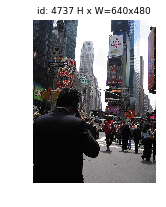

Processing 1 images
image                    shape: (640, 480, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
 Image_id    :  4737  Reference:  http://cocodataset.org/#explore?id=23569 Coco Id: 23569
 Image meta [4737  640  480    3    0  128 1024  896    0    0]
 Class ids   :  (1,)    [68]
 Class Names :  ['cell phone']


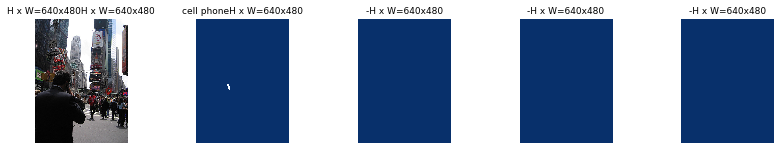

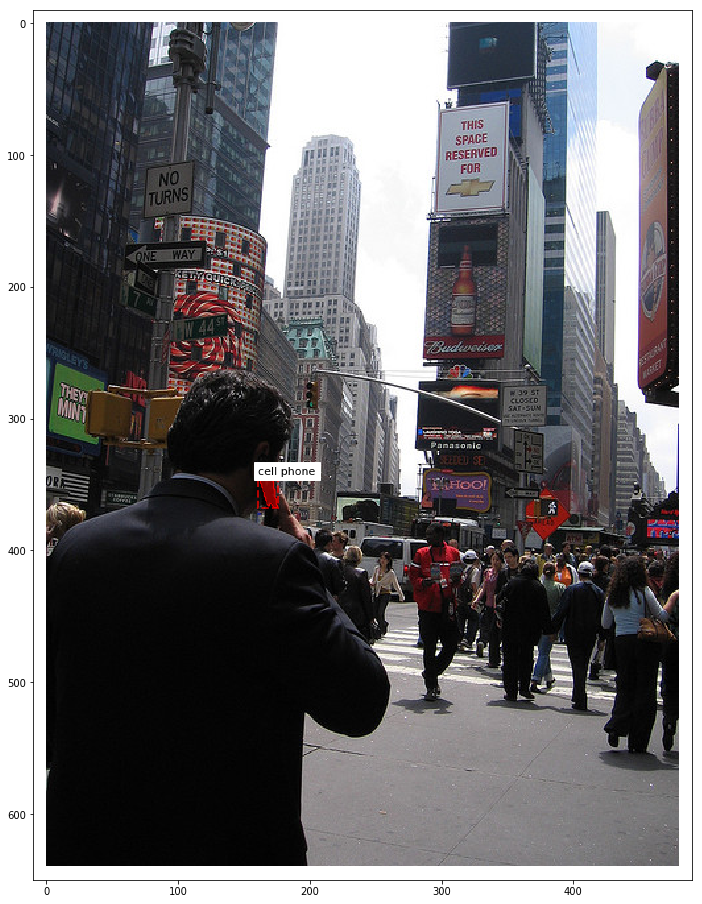

In [52]:
from mrcnn.prep_notebook import get_image_batch, get_training_batch
# images = get_image_batch(dataset_test, 4737, display = True)
batch_x = get_inference_batch(dataset_test, mrcnn_model, 4737, display = True)

##  Print some information about the model 

In [ ]:
# for layer in model.keras_model.layers
#     print layer.name 

layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print(len(layers))

for idx in range(200, len(layers)):
    print( ' layer: {} name: {}'.format(idx, layers[idx].name))
#     print(' layer {} :  {}'.format(idx,layers[idx]))
#     print(' Number of inbound nodes: ', end ='')
#     pp.pprint(len(layers[idx]._inbound_nodes))
#     pp.pprint(layers[idx].__dict__)
#     print('-------------------------------------------')
print('idx : ', idx)
pp.pprint(layers[idx].__dict__)

print()
pp.pprint(layers[idx]._inbound_nodes[0].__dict__)

####  Print Layer & Weight Info

In [ ]:
# keras_model = mrcnn_model.keras_model
# layers = keras_model.inner_model.layers if hasattr(keras_model, "inner_model") else keras_model.layers
# print(dir(layers[0]))
# pp.pprint(layers[7].weights)
print()
for i in range(len(layers)):
    print('\n{:3d} {:20s} Weights: {}'.format(i, layers[i].name, len(layers[i].weights))) ## [weight.name for weight in layers[i].weights]))
    print('{:23s}  Trainable: {} '.format(' ',[weight.name for weight in layers[i].trainable_weights]))
    for weight in layers[i].weights:
        print('{:25s} {:30s} {}  '.format(' ',weight.name,  weight.shape))

####  More layer information

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

# model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
# print('\n Metrics (_get_deduped_metrics_names():) ') 
# pp.pprint(mm._get_deduped_metrics_names())
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(mm.metrics_names)
# KB.set_learning_phase(0)
# print(' Learning phase values is L ' ,KB.learning_phase())
# print('\Layers ', len(mrcnn_model.keras_model.layers))
# pp.pprint(mrcnn_model.keras_model.layers)

print('\n Weights: ') 
## Get weieights acturally returns weight dims
# print(' Number of weights arrays: ',len(mrcnn_model.keras_model.get_weights()))
print(' length of model.keras_model.weights', len(mrcnn_model.keras_model.weights))
# for i,j in enumerate(mrcnn_model.keras_model.weights):
#     print(i, j) # j.name, j.shape, j.dtype)
# pp.pprint(mrcnn_model.keras_model.weights)
# pp.pprint(type(mrcnn_model.keras_model.get_weights()))

# pp.pprint(dir(model.keras_model))
# print(mrcnn_model.keras_model.weights[1])

#### Loaded dataset information

In [ ]:
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
# for i, info in enumerate(dataset_test.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

#### List trainable layers using `get_trainable_layers()`

In [ ]:
for i in  mrcnn_model.get_trainable_layers():
    print(' Layer:', i.name)       

####  Get a list of trainable layers, i.e., layers that have weights

In [ ]:
# trainable = mrcnn_model.get_trainable_layers()
layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print('Trn  Idx   Layer Name   \t\t InputNode LayerNames \t\t InputNode LayerShapes')
for idx, layer in enumerate(layers):
    TrnFlg = 'T' if layer.get_weights() else ' '
    all_input_shapes = [node.input_shapes   for node in layer._inbound_nodes][0]
    input_nodes  = [node for node in layer._inbound_nodes]
    all_nodes_layers  = [node.inbound_layers for node in input_nodes]   
#     print(all_input_nodes)
#     all_nodes_layers  = [[node.inbound_layers for node in input_nodes]  for input_nodes in layer._inbound_nodes]  #[node for node in all_input_nodes]]]
    all_input_layer_names = [[layer.name for layer in node_layers] for node_layers in all_nodes_layers][0]        
    str_names = ','.join(map(str, all_input_layer_names)) 
    str_shapes = ','.join(map(str, all_input_shapes)) 
    print(' {} ; {:3d} ; {:25s}; {:30s}; {:30s} '.format( TrnFlg, idx, layer.name,  str_names, str_shapes))

In [ ]:
print()    
for i in range(194,len(layers)):
# for i in [206]:
    layer = layers[i]
    print('====================================================='.format(i))
    print('== Layer {} : {} '.format(i,layer.name))
    print('====================================================='.format(i))
    pp.pprint(layer.__dict__)
    print()
    for j,node in enumerate(layer._inbound_nodes):
        print('== Inbound Node {} ========================================='.format(j))
        print(type(node))
        pp.pprint(node.__dict__)
        node_inlayers_names = [n.name for n in node.inbound_layers]
        print(node_inlayers_names)

## Detection

In [6]:
### Display loaded shapes
test_batch_x, test_batch_y = next(test_generator)

 DATAGEN starting image_index   -1 len of image ids : 40137


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Image id   :  34932
Image meta :  [34932   451   640     3   151     0   873  1024     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1]
Class_ids  :  (2,)
Class_ids  :  [ 1 32]


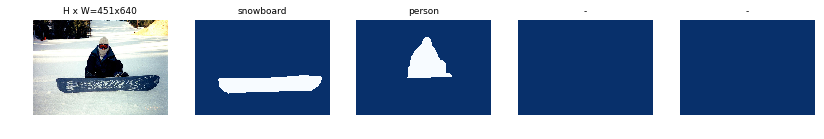

 display_instances() : Image shape:  (451, 640, 3)


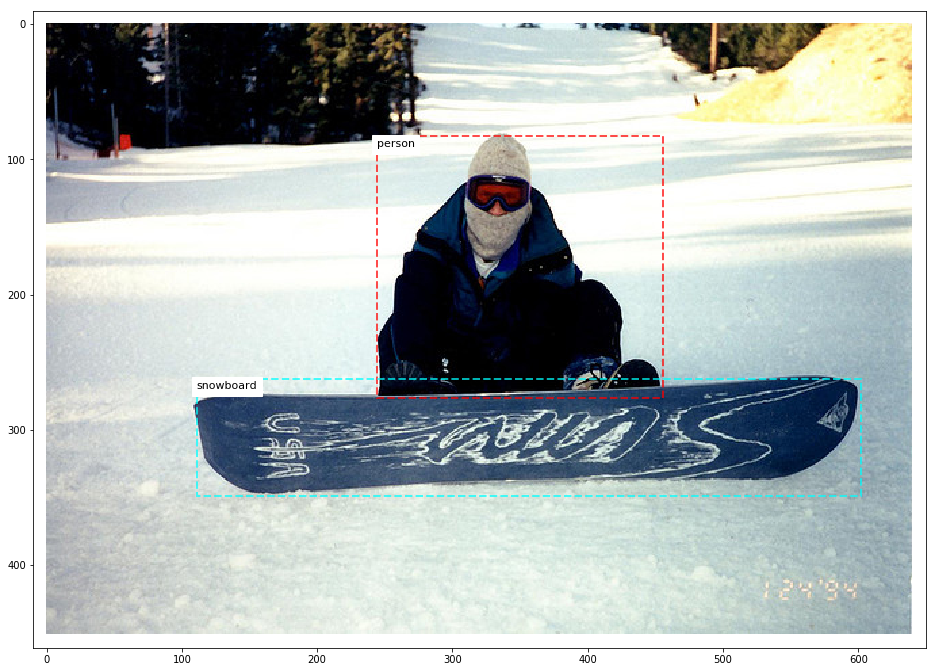

In [7]:
# 22380 , 28614
# persons : 30531
test_batch_x, test_batch_y = next(test_generator)
imgmeta_idx = mrcnn_model.keras_model.input_names.index('input_image_meta')
img_meta    = test_batch_x[imgmeta_idx]
class_names = dataset_test.class_names

for img_idx in range(mrcnn_config.BATCH_SIZE):
    image_id = img_meta[img_idx,0]
    image    = dataset_test.load_image(image_id)
    mask, class_ids = dataset_test.load_mask(image_id)
    bbox = utils.extract_bboxes(mask)

    print('Image id   : ',image_id)
    print('Image meta : ', img_meta[img_idx])
    print('Class_ids  : ',class_ids.shape)
    print('Class_ids  : ',class_ids)
    visualize.display_top_masks(image, mask, class_ids, dataset_test.class_names)
    # visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
    visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

#### Load a specific image using `data_gen_simulate`

 Converted to image index -->  [34932]
 batch size is : 1
 load image ud:  34932


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Image id   :  34932
Image meta :  [34932   451   640     3   151     0   873  1024     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1]
Class_ids  :  (2,)


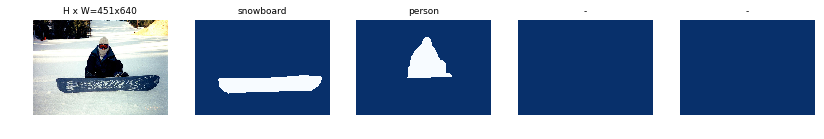

 display_instances() : Image shape:  (451, 640, 3)


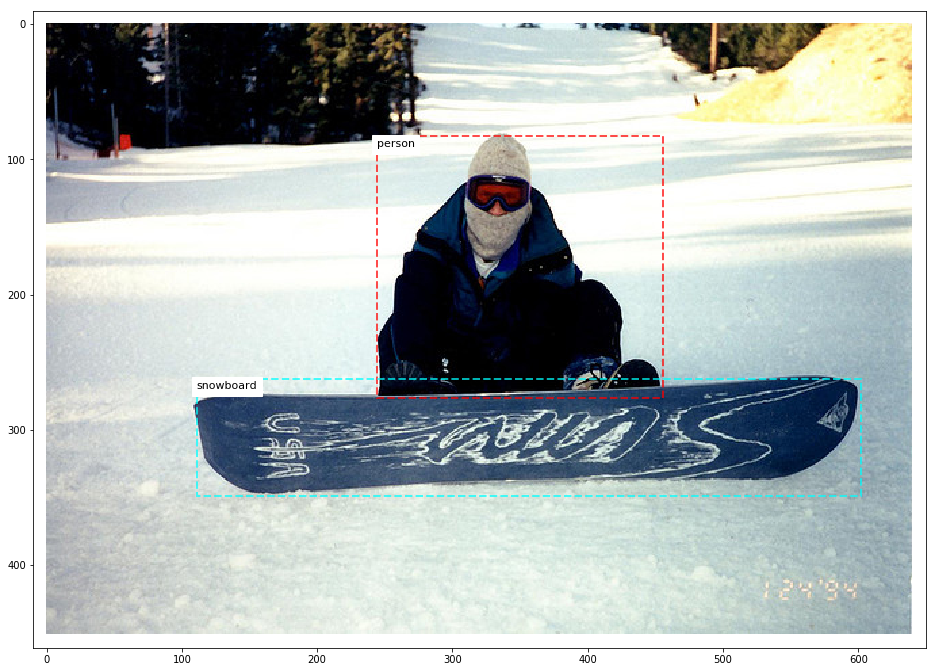

In [8]:
from mrcnn.datagen  import data_gen_simulate    # 13378, 33816
test_x, test_y = data_gen_simulate(dataset_test, mrcnn_config, 34932)
img_meta2    = test_x[imgmeta_idx]
class_names2 = dataset_test.class_names

for img_idx in range(mrcnn_config.BATCH_SIZE):
    image_id2 = img_meta2[img_idx,0]
    image2    = dataset_test.load_image(image_id2)
    mask2, class_ids2 = dataset_test.load_mask(image_id2)
    bbox2 = utils.extract_bboxes(mask2)

    print('Image id   : ', image_id2)
    print('Image meta : ', img_meta2[img_idx])
    print('Class_ids  : ', class_ids2.shape)
    visualize.display_top_masks(image2, mask2, class_ids2, class_names2)
    # visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
    visualize.display_instances(image2, bbox2, class_ids2, class_names2)

####  Compare values returned from Data Generator and `data_gen__simulate`

In [10]:
for i,j in zip(test_x, test_batch_x):
    print(len(i), '--- ', len(j), '      ', i.shape, '---', j.shape)

#     print(np.all(i==j))
ctr = 0 

print(test_x[2].shape[1])
print(np.where(test_x[2][0,:,0] == 1)[0])
test_x_pos = np.where(test_x[2][0,:,0] == 1)[0]
test_x_neg = np.where(test_x[2][0,:,0] == -1)[0]
test_x_nut = np.where(test_x[2][0,:,0] == 0)[0]

test_batch_x_pos = np.where(test_batch_x[2][0,:,0] == 1)[0]
test_batch_x_neg = np.where(test_batch_x[2][0,:,0] == -1)[0]
test_batch_x_nut = np.where(test_batch_x[2][0,:,0] == 0)[0]

for j in range(test_x[2].shape[1]):
    if (test_x[2][0,j,0] == test_batch_x[2][0,j,0]) and (test_x[2][0,j,0] == -1):
        list_1.append(j)
#         print(' j : {}   test_x: {}   test_batcgh_x: {}'.format( j, test_x[2][0,j,0], test_batch_x[2][0,j,0]))
        ctr +=1 
print('total : ', ctr)
print('test_x        pos:{}  neg:{} neutral:{}'.format(len(test_x_pos),len(test_x_neg), len(test_x_nut)) )
print('test_batch_x  pos:{}  neg:{} neutral:{}'.format(len(test_batch_x_pos),len(test_batch_x_neg), len(test_batch_x_nut)) )
# print(test_x_pos)
# print(test_batch_x_pos)
# print(test_x_neg)
# print(test_batch_x_neg)

1 ---  1        (1, 1024, 1024, 3) --- (1, 1024, 1024, 3)
1 ---  1        (1, 89) --- (1, 89)
1 ---  1        (1, 261888, 1) --- (1, 261888, 1)
1 ---  1        (1, 256, 4) --- (1, 256, 4)
1 ---  1        (1, 100) --- (1, 100)
1 ---  1        (1, 100, 4) --- (1, 100, 4)
261888
[259348 260006]
total :  0
test_x        pos:2  neg:254 neutral:261632
test_batch_x  pos:2  neg:254 neutral:261632


# Run Object Detection

###  Test on loaded image

In [ ]:
# run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
# # print(type(run_opts))
# print(dir(run_opts))
# dct = {"options":  run_opts}
# print(dct)
# setattr(mrcnn_model.keras_model, '_function_kwargs', {})
# print(getattr(mrcnn_model.keras_model, '_function_kwargs',{}))

In [11]:
results = mrcnn_model.detect([image], verbose=1)

Processing 1 images
image                    shape: (451, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (1, 1000, 81) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (1, 1000, 81, 4) <class 'numpy.ndarray'>
     image_meta         : (1, 89) <class 'numpy.ndarray'>


 Detections are:
[[278.     391.     582.     691.       1.       0.9994]
 [565.     219.     719.     932.      37.       0.7925]
 [545.     657.     587.     727.      37.       0.6088]
 [235.     767.     248.     775.       1.       0.5873]
 [582.     152.     711.     997.      32.       0.3941]]
    return from  predict()
    Length of detections :  1
    Length of rpn_roi_proposals   :  1
    Len

[ 79 244 269 431]     1    person..............  0.9994 
[258 136 354 582]    37    skateboard..........  0.7925 
[246 410 272 454]    37    skateboard..........  0.6088 
[ 52 479  60 484]     1    person..............  0.5873 
[269  94 349 622]    32    snowboard...........  0.3941 
 display_instances() : Image shape:  (451, 640, 3)


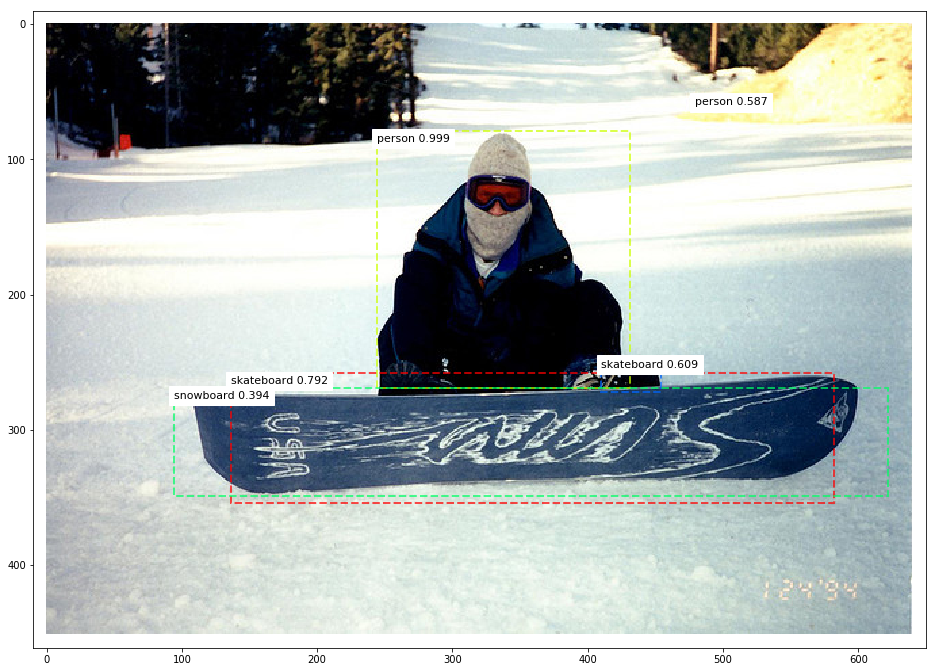

In [12]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

### Test on a random image from images folder

262985539_1709e54576_z.jpg


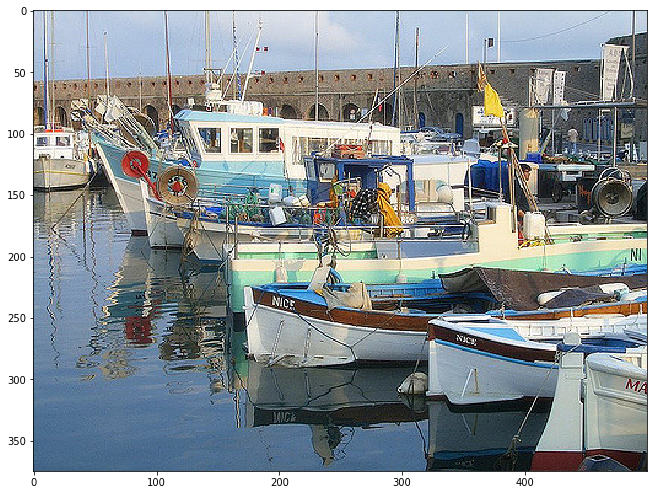

In [19]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = '/home/kbardool/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [20]:
# Run detection
results = mrcnn_model.detect([image], verbose=1)

Processing 1 images
image                    shape: (375, 500, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (1, 1000, 81) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (1, 1000, 81, 4) <class 'numpy.ndarray'>
     image_meta         : (1, 89) <class 'numpy.ndarray'>


 Detections are:
[[ 367.        4.      429.       94.        9.        0.9979]
 [ 633.      682.      738.     1013.        9.        0.9879]
 [ 306.      335.      622.      990.        9.        0.9835]
 [ 553.      355.      738.      737.        9.        0.9677]
 [ 142.       96.      524.      772.        9.        0.9675]
 [ 316.        0.      381.       94.        9.        0.9612]
 [ 667.    

[116   1 146  45]     9    boat................  0.9979 
[246 333 297 494]     9    boat................  0.9879 
[ 86 163 241 483]     9    boat................  0.9835 
[207 173 297 359]     9    boat................  0.9677 
[  6  46 193 376]     9    boat................  0.9675 
[ 91   0 123  45]     9    boat................  0.9612 
[263 424 287 497]     9    boat................  0.8990 
[123 396 155 461]     8    truck...............  0.8367 
[218 247 372 479]     9    boat................  0.7999 
[ 53 103 157 278]     9    boat................  0.7581 
[142 205 159 214]     1    person..............  0.7555 
[107  67 182  99]     9    boat................  0.6256 
[ 91  39 118  76]     9    boat................  0.6017 
[118  71 193 240]     9    boat................  0.5980 
[149 215 176 225]     1    person..............  0.5913 
[179 227 235 353]     9    boat................  0.5858 
[250 379 270 492]     9    boat................  0.5329 
[191 168 219 229]     9    boat

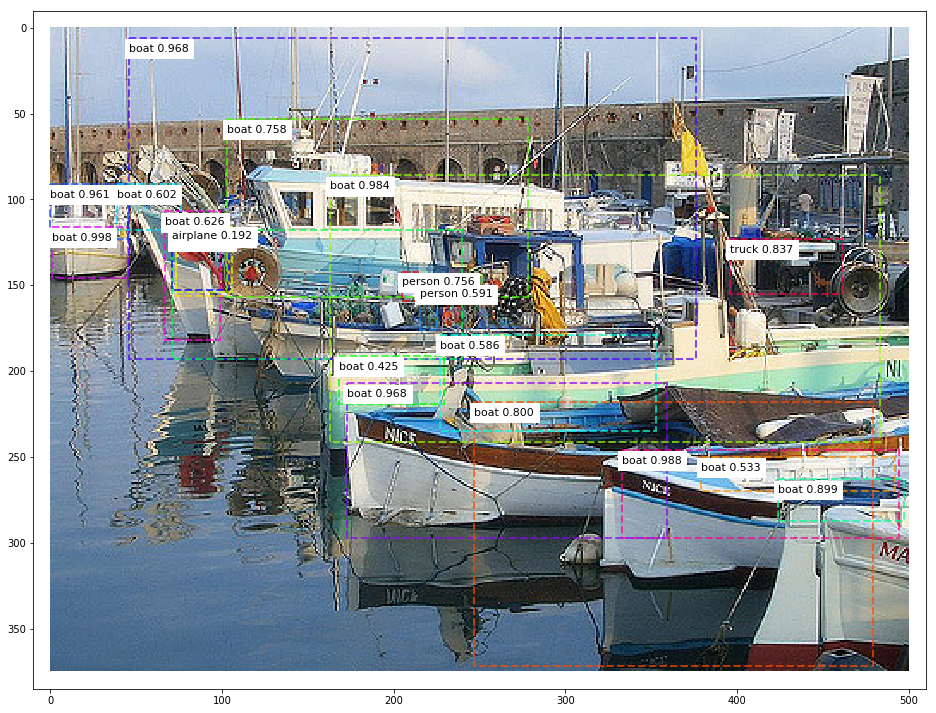

In [30]:
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox, cls, dataset_test.class_names[cls], scr))
    
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores']) #, score_range=(0.21, 0.22))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 

image_ids = np.random.choice(dataset_test.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        load_image_gt(dataset_test, mrcnn_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(utils.mold_image(image, mrcnn_config), 0)
    # Run object detection
    results = mrcnn_model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id,
                         r["rois"], r["class_ids"], r["scores"])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

###  Simulation of `detect()` routine

In [ ]:
# print('>>> model detect()')
verbose = 1
images  = [original_image]
assert model.mode   == "inference", "Create model in inference mode."
assert len(images) == model.config.BATCH_SIZE, "len(images) must be equal to BATCH_SIZE"

if verbose:
    log("Processing {} images".format(len(images)))
    for image in images:
        log("image", image)

# Mold inputs to format expected by the neural network
molded_images, image_metas, windows = model.mold_inputs(images)
if verbose:
    log("molded_images", molded_images)
    log("image_metas"  , image_metas)

## Run object detection pipeline
# print('    call predict()')
detections, rpn_rois, rpn_class, rpn_bbox,\
            mrcnn_class, mrcnn_bbox, mrcnn_mask \
                      =  model.keras_model.predict([molded_images, image_metas], verbose=0)

print('    return from  predict()')
print('    Length of detections : ', len(detections))
print('    Length of rpn_rois   : ', len(rpn_rois   ))
print('    Length of rpn_class  : ', len(rpn_class  ))
print('    Length of rpn_bbox   : ', len(rpn_bbox   ))
print('    Length of mrcnn_class: ', len(mrcnn_class))
print('    Length of mrcnn_bbox : ', len(mrcnn_bbox ))
print('    Length of mrcnn_mask : ', len(mrcnn_mask ))

####  detection array layout is `[ y1, x1, y2, x2, class, score]`

detections[0].shape
print(detections[0])

## Process detections
results = []
for i, image in enumerate(images):
    final_rois, final_class_ids, final_scores, final_masks =\
        model.unmold_detections(detections[i], 
                               mrcnn_mask[i],
                               image.shape  ,
                               windows[i])
    results.append({
        "rois"     : final_rois,
        "class_ids": final_class_ids,
        "scores"   : final_scores,
        "masks"    : final_masks,
    })